# 2.4 Statistical Decision Theory

#### Loss function

The most common is *squared error loss*: $L(Y, f(X)) = (Y - f(X))^2$

#### Expected prediction Error
(2.9, 2.10) This leads us to a criterion for choosing $f$, 
 
$$EPE(f) = E(Y - f(X))^2 = \int{[y - f(x)]^2}Pr(dx, dy)$$

(2.11) By conditioning on X, we can write EPE as: 

$$EPE(f) = E_X E_{Y|X} ([Y - f(X)]^2|X) $$

Proof:

$$
\begin{equation}
 \int{[y - f(x)]^2}Pr(dx, dy) \\
 = \int{[y - f(x)]^2}p(x, y)dxdy \\ 
 = \int{[y - f(x)]^2}p(x)p(y | x)dxdy \\
 = \int_x { \left( \int_y {[y - f(x)]^2p(y | x)dy} \right)p(x)dx } \\
 = E_X E_{Y|X} ([Y - f(X)]^2|X)
\end{equation}
$$

(2.12) It suffices to minimize EPE pointwise: $$f(x) = argmin_c E_{Y|X} ( [Y - c]^2 | X = x)$$

(2.13) The solution is : $$f(x)=E(Y | X = x)$$

The **nearest-neighbor** methods attempt to directly implement this recipe
using the training data. Since there is typically at most one observation
at any point x, we settle for:  $$\hat{f}(x) = \text{Ave}(y_i|x_i \in N_k(x))$$

For large training sample size N, the points in the neighborhood are likely
to be close to x, and as k gets large the average will get more stable.

How does **linear regression fit** into this framework ?

$$f(x) \approx x^T\beta$$

Plugging this into EPE (2.9) and differentiating
we can solve for β:

$$\beta= [E(XX^T)]^{-1}E(XY)$$

Proof:

$$
\begin{equation}
 \int{[y - x^T\beta]^2\text{ Pr}(dx, dy)} \\
 = \int{[y^2 - 2yx^T+(x^T\beta)^2]\text{ Pr}(dx, dy)} \\
\end{equation}
$$

Differentiating w.r.t $\beta$:

$$
\begin{equation}
 2\int{xx^T\beta\text{ Pr}(dx, dy)} -  2\int{xy\text{ Pr}(dx, dy)} = 0 \\
 2 \times (E(XX^T\beta) - E(XY)) = 0 \\
 E(XX^T)\beta = E(XY) \\
 \beta = [E(XX^T)]^{-1}E(XY)
\end{equation}
$$

The least squares solution $\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$   amounts to replacing the expectation in $\beta = [E(XX^T)]^{-1}E(XY)$ by averages over the training data. **Note:** Each expectation produces N times more than average, however the constant (i.e 1/N) in two expectations cancel out each other.


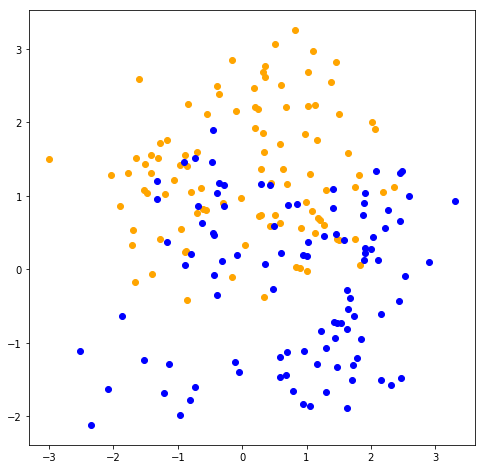

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

sample_size = 100

def generate_data(size, mean):
    identity = np.identity(2)
    m = np.random.multivariate_normal(mean, identity, 10)
    return np.array([
        np.random.multivariate_normal(random.choice(m), identity / 5)
        for _ in range(size)
    ])

def plot_data(orange_data, blue_data): 
    axes.plot(orange_data[:, 0], orange_data[:, 1], 'o', color='orange')
    axes.plot(blue_data[:, 0], blue_data[:, 1], 'o', color='blue')
    
blue_data = generate_data(sample_size, [1, 0])
orange_data = generate_data(sample_size, [0, 1])

# plotting
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)
plot_data(orange_data, blue_data)

plt.show()